#  Storage- electron-Ring-RF

In [1]:
#physical constant

clight=299792458      # m/s
me0=9.107e-31 # mass of electron kg
eps0=8.854e-12   # permitivity of free-space
mu0=4*pi*1e-7  # H/m
qe=1.602e-19 #C
Bzk=1.380e-23 # Boltzmann's constant j/K
Pkh=6.626e-34  # Planck's constant  J-sec
re=1/(4*pi*eps0)*qe^2/(me0*clight^2)  # classical radius of electron

Cgamma=4*pi/3*re/(me0*clight^2)^3*(qe*10^9)^3  # m/GeV^3  This is sychrotron radiation constant

using PyPlot

In [2]:
# RF
sigmas=0.008 #(3mm)
sigmat=sigmas/clight
frms=clight/sqrt(2)/pi/sigmas
deltaTforACE3P=1/(75*frms)*clight
wakelength=clight*1.6e-9


# RF Frequencies
Crev=3834.9
frev=clight/Crev
f9MHz=frev*120
f28MHz=frev*360
T28MHz=1/f28MHz
f56MHz=frev*720
frfharm=frev*720*10
frf=f56MHz*10
Trf=1/frf
Krf=2*pi/(clight*Trf)
Omegarf=2*pi/Trf
Lcaveff=1.157 #m
RoQ2cell=146;  # R/Q per cell
Q0=2e10;
Lamdarf=clight/frf
Lcell=Lamdarf/2

Ne=31.e10
Qb=Ne*qe
Ib=Ne*qe*f28MHz

# Lattice
Ee0=me0*clight^2/qe #0.511 MeV
rho_dipole=253 # m

gammaT=31
alpha_compact=1/gammaT^2 # for the energy lower than the transition energy
gt=sqrt(1/9.589601e-4)
5.2/0.01412534228
3.42/0.0078036817


438.25467663551683

# Storage Ring parameters==> requirement of the RF system

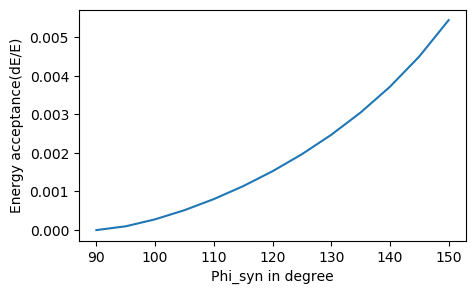

PyObject Text(24.0, 0.5, 'Energy acceptance(dE/E)')

In [3]:
# Synchronic Energy loss per particle per turn 
function Usynloss(Eb,rho,bendingfactor)   # Unit: eV or V
    return Cgamma*(Eb/1e9)^4/(rho*bendingfactor)*1e9  # Eb in GeV, rho is dipole radius, bendingfactor for supper band
end

# sychrotron radiation power per bunch per turn 
function Psynloss(Eb,rho,bendingfactor,Ib)  # Unit in W
    U0=Usynloss(Eb,rho,bendingfactor)
    return U0*Ib
end


Psynloss(5e9,rho_dipole,0.086,Qb*f28MHz)
# energy acceptance
function dEoverE_acceptance(Eb,rho,bendingfactor,alpha_c,frf,phi_syn)
    U0=Usynloss(Eb,rho,bendingfactor)
    h=frf/frev
    return sqrt(2*U0/(pi*alpha_c*h*Eb)*(sqrt((1/sin(phi_syn))^2-1)-acos(sin(phi_syn))))
end

# detuning frequency 

function Detuning_cav(I0,phi,RoQ,Vc)
    return frf*I0*RoQ/2/Vc*cos(phi)   # detuning frequency
end
    
phi_syn_accept=11.5*pi/180

# required Rf cavity voltage

function Vc(Ncav,phi,Eb,rho,bendingfactor)
    return Usynloss(Eb,rho,bendingfactor)/sin(phi)/Ncav  # required voltage per cavity
end

# Tune

function Qs_tune(Eb,rho,bendingfactor,alpha_c,frf,Vcav,Ncav)
    U0=Usynloss(Eb,rho,bendingfactor)
    h=frf/frev
    return sqrt(alpha_c*h/(2*pi*Eb)*sqrt((Vcav*Ncav)^2-U0^2))
end

function Qs_tune2(alpha_c,h,Eb,Vcav,Ncav,U0)
    
    return sqrt(alpha_c*h/(2*pi*Eb)*sqrt((Vcav*Ncav)^2-U0^2))
end

# Synchron frequency

function fsyn(Qs,frev)
    return Qs*frev
end

# rms bunch energy spread sigmaE/E in the iso-magnetic machine
function sigmaEoverEb(Eb,Je,rho,bendingfactor)
    gamma=Eb/Ee0
    Cq= 55*Pkh*clight/32/sqrt(3)/me0/clight^2/2/pi
    D=0   
    Je=2-D    # logitudinal damping partition number
    return gamma*sqrt(Cq/Je/rho/bendingfactor)
end

# bunch length
function rmsbunchlength(alpha_c,R,Qs,sigmaEoverE)
    return alpha_c*R/Qs*sigmaEoverE
end

fig=figure(figsize=(5,3))
phi=90:5:150
plot(phi,map(phi->dEoverE_acceptance(5e9,rho_dipole,0.086,alpha_compact,frf,phi*pi/180),phi))
xlabel("Phi_syn in degree")
ylabel("Energy acceptance(dE/E)")


In [4]:
Usynloss(10e9,368,0.0)

Inf

In [5]:
Vc(1,165*pi/180,5e9,rho_dipole,0.0086)

9.823124106463765e7

In [6]:
Qs_tune(5e9,rho_dipole,0.086,alpha_compact,frf,Vc(5,phi_syn_accept,5e9,rho_dipole,0.086),5)

0.05459102485200426

In [7]:
Detuning_cav(Ib,3.03,RoQ2cell/2,0.57e6)

-50061.14536874114

In [8]:
Vc(5,phi_syn_accept,5e9,rho_dipole,0.086)

2.5504719287889684e6

In [9]:
Cq= 55*Pkh*clight/32/sqrt(3)/me0/clight^2/2/pi

3.8329010484659114e-13

In [10]:
sigmaEoverEb(5e9,2,rho_dipole,0.086)

0.0009184491009288707

In [11]:
rmsbunchlength(alpha_compact,Crev/2/pi,Qs_tune(5e9,rho_dipole,0.086,alpha_compact,frf,Vc(5,phi_syn_accept,5e9,rho_dipole,0.086),5),sigmaEoverEb(5e9,2,rho_dipole,0.086))

0.01068524866574576

In [12]:
fsyn(Qs_tune(5e9,rho_dipole,0.086,alpha_compact,frf,Vc(5,phi_syn_accept,5e9,rho_dipole,0.086),5),frev)

4267.641274901938

In [13]:
#Qs_tune(Eb,rho,bendingfactor,alpha_c,frf,Vcav,Ncav) Vc(Ncav,phi,Eb,rho,bendingfactor)
#Qs_tune2(alpha_c,h,Eb,Vcav,Ncav,U0)
Qs_tune2(9.589601e-4,7200,10e9,22.9e6,1,3.665629e6)

0.04983977875992421

# Higher harmonic cavity

In [24]:
alpha_compact

0.001040582726326743

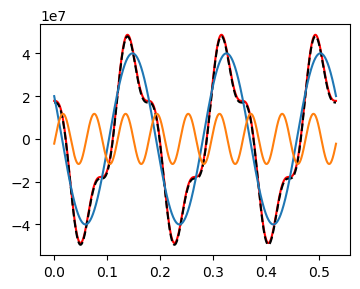

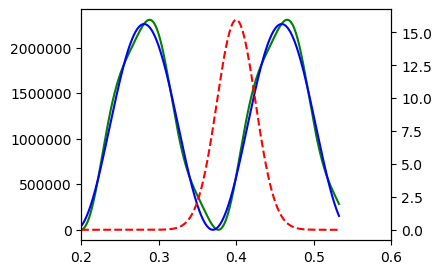

-10.893394649130904

In [26]:
#Plot of second harmonics cavity's effect
vrf=40e6
omegarf=2*pi*frf
h=3
phi10=150*pi/180
phi20=atan(tan(phi10)/h)/h
kharmV=-cos(phi10)/(h*cos(atan(tan(phi10))/h))*1

v1(z,phi1)=vrf*sin(omegarf*z/clight+phi1)
v2(z,phi2)=vrf*kharmV*sin(omegarf*h*z/clight+h*phi2)
vtotal(z,phi1,phi2)=vrf*sin(omegarf*z/clight+phi1)+kharmV*vrf*sin(omegarf*h*z/clight+h*phi2)
vtotal22(z,phi1)=vrf*(sin(omegarf*z/clight+phi1)-sin(phi1)-1*(sin(phi1)*(cos(h*omegarf*z/clight)-1)/h^2+cos(phi1)*sin(h*omegarf*z/clight)/h))
z=0:1e-4:clight/frf*h

fig=figure(figsize=(4,3))
plot(z,map(z->vtotal(z,phi10,phi20),z),"r-",z,map(z->vtotal22(z,phi10)+1.7e7,z),"k--")
plot(z,map(z->v1(z,phi10),z))
plot(z,map(z->v2(z,phi20),z))

Phi_pwell(z,phi1,phi2)=clight*vrf/omegarf*(cos(phi1)-cos(omegarf*z/clight+phi1))+clight*kharmV*vrf/(h*omegarf)*(cos(h*phi2)-cos(h*omegarf*z/clight+h*phi2))
Phi_pwell_rf(z,phi1)=clight*vrf/omegarf*(cos(phi1)-cos(omegarf*z/clight+phi1))

fig=figure(figsize=(4,3))
plot(z,-map(z->(Phi_pwell(z,phi10,phi20)),z).-minimum(-map(z->(Phi_pwell(z,phi10,phi20)),z)),"g-")
plot(z,-map(z->(Phi_pwell_rf(z,phi10)),z).-minimum(-map(z->(Phi_pwell_rf(z,phi10)),z)),"b-")
sigmaz=0.025
offset=0.4
#fig=figure(figsize=(5,4))
Gaussion(s,offset)=1/sqrt(2*pi)/(sigmaz)*exp(-0.5*((s-offset)/(sigmaz))^2) 
twinx()
plot(z,map(s->Gaussion(s,offset),z),"r--")
xlim(0.2,0.6)
#sigz_lengthing=1/sqrt(-2*vrf2*2/vrf*cos(phi10)-1)
phi20=atan(tan(phi10)/h)*180/pi

In [27]:
330*38.4e-9*123*2*pi*f28MHz*30/360/2


11483.86457519889

In [28]:
Q0=2.3e10
I0=Qb*660*frev
Tf0=2*Q0/Omegarf
Tau0=1/f56MHz/Tf0
Vb0=I0*RoQ2cell*Q0*Tau0*660

7.81172158218978e6

In [29]:
function deltaf(Qbx,fbunch,phis,RoQx,Vc,Qex)
    Q0=2.3e10
    tanPsi=-Qbx*fbunch*sin(phis)*RoQx*Q0/Vc/(1+Q0/Qex)
    delta=tanPsi/2/Qex
    deltaf=-frf*delta
    return deltaf
end

df=deltaf(Qb,f56MHz,170*pi/180,RoQ2cell,22.88*1e6/11,2.96e4)

28961.34764009277

In [30]:
exp(-(f28MHz*20*3*0.02/clight)^2)

0.9873902424634915

# Transient effects

In [36]:
function Tdecay(omegax,Qex)
    return  2*Qex/omegax  # Voltage decay 
end

function Vbg(omegax,RoQx,Qbx)
    return RoQx*omegax*Qbx/2  # voltage excited by a bunch
end
Qb=50e-9
frf=f28MHz*20*3
RoQ=103
Vb0=Vbg(2*pi*frf,RoQ,Qb)
Nbunch=660
Qe=1.19e5
fbunch=f28MHz*2

# At the time just after kth macro-pulse:
function Vbtrain(Nbunch,deltafdetune,Qe,fbunch,t)
    xbunch=Nbunch
    Vbt=zeros(Complex{Float64},xbunch)
    Vbt[1]=Vb0
    dfdetuning=deltafdetune  # detuning the cavity Hz
    fcav=frf-dfdetuning
    Qext=Qe
    Tfill=2*Qext/Omegarf
    fb=fbunch
    Tb=1/fb
    Tau=Tb/Tfill # 
    deltaphase=Tb*(dfdetuning)*2*pi
    tanPhi=deltaphase/Tau
    for n=2:xbunch
        Vbt[n]=Vbt[n-1]*exp(-Tau)*exp(-1im*deltaphase)+Vbt[1]
    end  
    print(Tau)
    return  Vbt
end
Vbtrain(Nbunch,0,Qe,fbunch,0)[Nbunch]*30/360


0.00026399938265460446

1.3791487614557382e6 + 0.0im

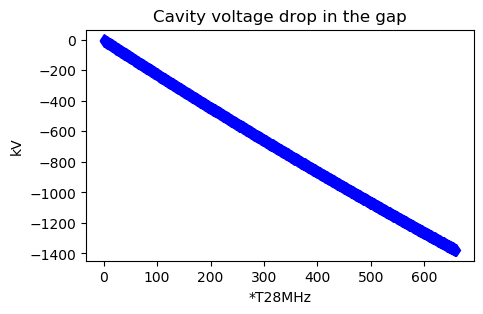

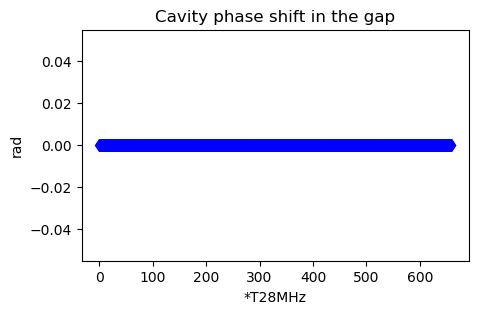

0.00026399938265460446

PyObject Text(0.5, 1, 'Cavity phase shift in the gap')

In [38]:
#Vbtrain(Nbunch,deltafdetune,Qe,fbunch,t)
Vbt=Vbtrain(Nbunch,0,Qe,fbunch,0)*30/360
fig=figure(figsize=(5,3))
#aa=Vbtre+1im*Vbtim
#plot(-abs(Vbt)/1e3,"ro")
plot(-real(Vbt)/1e3,"bd")
ylabel("kV")
xlabel("*T28MHz")
title("Cavity voltage drop in the gap")
fig=figure(figsize=(5,3))
plot(atan.(imag.(Vbt)./real(Vbt)),"bd")
ylabel("rad")
xlabel("*T28MHz")
title("Cavity phase shift in the gap")

In [43]:
# Rev D (2017-11-08)
# Thinking how best to plot all third harmonic cases, i.e. from optimal phase to zero synchronous phase for h3.
# Idea is to see if I can minimize 3rd harmonic FPC power requirement, at least get it down to 20kW.

# Rev C
# MMB confirms he gets same powers I'm getting.

# Constants ####################################################################
c = 2.99792458E8						# Speed of light                   (m/s)
Cr = 3833.845							# RHIC nominal circumference       (m)

# Functions ####################################################################
wavelength(x) = c/x						# Free space wavelength, x is frequency
wavenum(x)    = 2*pi/wavelength(x)		# Wavenumber

function phis(n)                                        # Calculate H1 synchronous phase
    if n == 1
        return pi - asin(U1/V1)                         # Standard phis if no Hn
    elseif n > 1
        return pi - asin((U1/V1)*(1-1/(1-n^2)))        # Scale phis to account for Hn
    else
        error("Error: n < 1")
    end
end

# Derived Parameters ###########################################################
frev = c/Cr								# Nominal revolution freqeuncy (Hz)
wrev = 2*pi*frev
trev = 1/frev

@printf "\n\n\n"
@printf "******************************************************************************************\n"
@printf "Results for Higher Harmonic Calculation\n"
@printf "\n"

@printf "frev = %0.3f (Hz)\n" frev
@printf "wrev = %0.3f (Rad/s)\n" wrev
@printf "trev = %0.3f (us)\n" trev*1E6
@printf "\n"

h1 = 7200								# Fundamental harmonic number
h3 = 3*h1

f1 = h1*frev							# Fundamental RF frequency
f3 = h3*frev

# Voltages #####################################################################
V1 = 22.9								# Fundamental peak voltage (MV)
U1 = 3.67								# Energy loss per turn (MeV)

#gammaT = 31
gammaT = 31.0 							# e- ring 18 GeV gammaT
eta = (1/gammaT^2)						# Slip factor
E0 = 10.0E3								# Beam total energy (MeV)
sigmaEonE = 1.0E-3						# Beam energy spread
temp = 1.0*Cr*eta*E0*(sigmaEonE^2)		# For bunch profile calculation

@printf "Fundamental Frequency    = %7.3f (MHz)\n" f1/1E6
@printf "Beam Energy              = %7.3f (GeV)\n" E0/1000
@printf "gammaT      = %6.3f\n" gammaT
@printf "temperature = %6.3f\n" temp
@printf "\n"
@printf "Fundamental Peak Voltage = %5.3f (MV)\n" V1
@printf "Energy Loss per Turn     = %5.3f (MeV)\n" U1

println()

# Nominal and dual harmonic syncronous phases and amplitudes ###################
#phis1 = pi - asin(U1/V1)					 # Nominal phis without dual harmonic, above gammaT
#phis(n) = pi - asin((U1/V1)*(n^2)/(n^2-1))   # Phis with dual harmonic, second harmonic in h=n*h1

hh = 3

# Hn coefficients. 0 if n <= 1, implying H1 only calculation.

#A(n) = n>1 ? V1*(sin(phis(1))-sin(phis(n))) : 0                 # Calculated I&Q cofficients for harmonic n
A(n) = n>1 ? (-1/n^2)*V1*sin(phis(n)) : 0                      # Calculated I&Q cofficients for harmonic n
B(n) = n>1 ? (-1/n)*V1*cos(phis(n)) : 0                        # V(n) = A(n)cos(nx)+B(n)sin(nx)
M(n) = sqrt(A(n)^2 + B(n)^2)                                    # Mag of harmonic n
k(n) = n>1 ? sqrt((1/n^2)-((U1/V1)^2)*(1/(n^2-1))) : 0          # Scale factor for harmonic n
P(n) = n>1 ? 2*pi - (atan2(B(n),A(n)) + 1.5*pi) : 0             # Phase of harmonic n, converted to ref sin(nx+P(n))

# Voltage and Potential Well Functions ############################################################
k1 = wavenum(f1)
V(x)    = V1*sin(k1*x + phis(1))                  # Fundamental without higher harmonic
Vf(x,n) = V1*sin(k1*x + phis(n))				# Fundamental voltage when using higher harmonic n
kvh = 0.6                             # Kvh=1 is the optimum voltage
Vh(x,n) = kvh*(A(n)*cos(k1*n*x) + B(n)*sin(k1*n*x))	# Higher harmoncic voltage
#Vh(x,n) = 0*M(n)*sin(k1*n*x + P(n))
Vs(x,n) = Vf(x,n) + Vh(x,n)     				# Vector sum of fundmanetal and higher harmonic

function Well(x,n)
    if n>1
        return -(-V1*(1/k1)*cos(k1*x+phis(n)) + ((1/(k1*n))*kvh*A(n)*sin(k1*n*x) - (1/(k1*n))*kvh*B(n)*cos(k1*n*x)) + (1/k1)*V1*cos(phis(n))*(1-1/n^2) - x*Vs(0,n))
    else
        return -(-V1*(1/k1)*cos(k1*x+phis(1)) + (1/k1)*V1*cos(phis(1)) - x*V(0))
    end
end

bunch(x,n) = exp(-Well(x,n)/temp)   # Nominal bunch profile

len = wavelength(f1)/2.5
xlo = -len
xhi =  len
npts = 10000
binwidth = (xhi-xlo)/npts
areaf = 0
areahh = 0

for i=0:npts                            # Calculating areas under bunch profiles to use for normalization
    x = xlo + i*binwidth
    areaf = areaf + bunch(x,1)*binwidth
    areahh = areahh + bunch(x,hh)*binwidth
end

Nb = 660
Qb = 45.6E-9                            # Total bunch charge (nC)
Idc = Qb*Nb/trev                        # Avergae current in the ring

ql1(x)  = Qb*bunch(x,1)/areaf           # Bunch line charge density for no higher harmonic case (C/m)
qlhh(x) = Qb*bunch(x,hh)/areahh         # Bunch line charge density for higher harmonic case    (C/m)

i1(x) = ql1(x)*3E8                      # Bunch current profile (w/o  higher harmonic)  (A)
ihh(x) = qlhh(x)*3E8                    # Bunch current profile (with higher harmonic)  (A)


@printf "HH Num  =  %d\n" hh
@printf "phis(1) = %8.3f (deg), %6.3f (rad)\n" phis(1)*180/pi phis(1)
@printf "phis(%d) = %8.3f (deg), %6.3f (rad)\n" hh phis(hh)*180/pi phis(hh)
@printf "A(%d)    = %8.3f\n" hh A(hh)
@printf "B(%d)    = %8.3f\n" hh B(hh)
@printf "M(%d)    = %8.3f\n" hh M(hh)
@printf "k(%d)    = %8.3f\n" hh k(hh)
@printf "P(%d)    = %8.3f (deg), %0.3f (rad)\n" hh P(hh)*180/pi P(hh)
println()

@printf "For Nb = %d, with Qb = %0.2f (nC)\n" Nb Qb*1E9
@printf "Average Beam Current = %0.3f (A)\n" Idc
@printf "Peak Current (A) w/o higher harmonic = %0.3f, with higher harmonic = %0.3f, Ratio = %0.3f\n" i1(0) ihh(0) i1(0)/ihh(0)
#@printf "Ratio of Peak Current w/o higher harmonic to w/ higher harmonic = %0.3f\n" i1(0)/ihh(0)
println()

energyq1 =0
energyqs =0
energyqf =0
energyqh =0

for i=0:npts
    x = xlo + i*binwidth
    energyq1 = energyq1 + ql1(x)*binwidth*V(x)*1E6         # Energy kick to bunch on one turn without higher harmonic
    energyqs = energyqs + qlhh(x)*binwidth*Vs(x,hh)*1E6    # Energy kick to bunch from total voltage on one turn with higher harmonic
    energyqf = energyqf + qlhh(x)*binwidth*Vf(x,hh)*1E6    # Energy kick to bunch from fundamental voltage on one turn with higher harmonic
    energyqh = energyqh + qlhh(x)*binwidth*Vh(x,hh)*1E6    # Energy kick to bunch from harmonic voltage on one turn with higher harmonic
end

powerq1 = energyq1*Nb/trev          # Power transferred to bunch without higher harmonic
powerqs = energyqs*Nb/trev          # Power transferred to bunch from total voltage with higher harmonic
powerqf = energyqf*Nb/trev          # Power transferred to bunch from fund  voltage with higher harmonic
powerqh = energyqh*Nb/trev          # Power transferred to bunch from harm  voltage with higher harmonic

@printf "Power delivered to beam, calculated from integrated energy kicks along bunch\n"
@printf "Power delivered to beam, Without higher harmonic)       = %6.3f (MW)\n" powerq1/1E6
@printf "Power delivered to beam, Total (With higher harmonic)   = %6.3f (MW)\n" powerqs/1E6
@printf "Power delivered to beam, From H1 (With higher harmonic) = %6.3f (MW)\n" powerqf/1E6
@printf "Power delivered to beam, From H3 (With higher harmonic) = %6.3f (MW)\n" powerqh/1E6
println()

@printf "Synchronous voltages calcuated from voltage functions as V(0) (0 is bunch center)\n"
@printf "Vf(0,%d) = %0.3f\n" hh Vf(0,hh)
@printf "Vh(0,%d) = %0.3f\n" hh Vh(0,hh)
@printf "Vs(0,%d) = %0.3f\n" hh Vs(0,hh)
println()

#Start of translating MMB's Fortran evaluation of the average voltage seen by bunch #############################
vstop = 0
vftop = 0
vhtop = 0
rmstophh = 0
rmstoph1 = 0
vbot = 0
x = 0

for i=0:npts                                # Calculating weighted average voltages seen by bunch
    x = xlo + (xhi-xlo)*i/npts
    vstop = vstop + Vs(x,hh)*ihh(x)
    vftop = vftop + Vf(x,hh)*ihh(x)
    vhtop = vhtop + Vh(x,hh)*ihh(x)
    rmstophh = rmstophh + x*x*ihh(x)
    rmstoph1 = rmstoph1 + x*x*i1(x)
    vbot = vbot + ihh(x)
end

@printf "Average voltage calculated via weighted average summation, and power to beam as Vavg*Idc\n"
@printf "Average Total Voltage = %7.3f (MV), Power = %7.3f (MW)\n" vstop/vbot Idc*vstop/vbot
@printf "Average H1 Voltage    = %7.3f (MV), Power = %7.3f (MW)\n" vftop/vbot Idc*vftop/vbot
@printf "Average H3 Voltage    = %7.3f (MV), Power = %7.3f (MW)\n" vhtop/vbot Idc*vhtop/vbot
@printf "Average H1+H3 Voltage = %7.3f (MV), Power = %7.3f (MW)\n" (vftop+vhtop)/vbot Idc*(vftop+vhtop)/vbot

println()
@printf "H1 Only   rms bunch length = %4.1f (mm)\n" sqrt(rmstoph1/vbot)*1E3
@printf "Flattened rms bunch length = %4.1f (mm)\n" sqrt(rmstophh/vbot)*1E3

println()
z = pwd()
println("Current working directory = ",z)

#ATV = @sprintf "Average Total Voltage (MV) = %0.3f, Power (MW) = %0.3f\n" vstop/vbot Idc*vstop/vbot
f = open("eRHIC_h3_B_Plot_Config.txt","w")
write(f, @sprintf "Results for Higher Harmonic Calculation\n")
write(f, @sprintf "\n")

write(f, @sprintf "frev = %0.3f (Hz)\n" frev)
write(f, @sprintf "wrev = %0.3f (Rad/s)\n" wrev)
write(f, @sprintf "trev = %0.3f (us)\n" trev*1E6)
write(f, @sprintf "\n")

write(f, @sprintf "Fundamental Peak Voltage (MV) = %0.3f\n" V1)
write(f, @sprintf "Energy Loss per Turn    (MeV) = %0.3f\n" U1)
write(f, @sprintf "Beam Energy (MeV) = %0.3f\n" E0)
write(f, @sprintf "temperature = %0.3f\n" temp)
write(f, @sprintf "phis(1)   = %0.3f (deg), %0.3f (rad) [H1 phis without higher harmonic]\n" phis(1)*180/pi phis(1))
write(f, @sprintf "phis(%d) = %0.3f (deg), %0.3f (rad) [H1 phis with higher harmonic]\n" hh phis(hh)*180/pi phis(hh))
write(f, @sprintf "A(%d) = %0.3f [Cosine component of higher harmonic voltage]\n" hh A(hh))
write(f, @sprintf "B(%d) = %0.3f [Sine component of higher harmonic voltage]\n" hh B(hh))
write(f, @sprintf "M(%d) = %0.3f [Magnitude of higher harmonic voltage]\n" hh M(hh))
write(f, @sprintf "P(%d) = %0.3f (deg) [phis of higher harmonic voltage relative to positive zero crossing], %0.3f (rad)\n" hh P(hh)*180/pi P(hh))
write(f, @sprintf "\n")

write(f, @sprintf "For Nb = %d, with Qb = %0.2f (nC)\n" Nb Qb*1E9)
write(f, @sprintf "Average Beam Current = %0.3f (A)\n" Idc)
write(f, @sprintf "Peak Current w/o higher harmonic = %0.3f (A), with higher harmonic = %0.3f (A)\n" i1(0) ihh(0))
write(f, @sprintf "Ratio of Peak Current w/o higher harmonic to w/ higher harmonic = %0.3f\n" i1(0)/ihh(0))
write(f, @sprintf "\n")

write(f, @sprintf "Power delivered to beam calculated from integrated energy kicks along bunch\n")
write(f, @sprintf "Power delivered to beam, (No higher harmonic)           = %0.3f (MW)\n" powerq1/1E6)
write(f, @sprintf "Power delivered to beam, Total (With higher harmonic)   = %0.3f (MW)\n" powerqs/1E6)
write(f, @sprintf "Power delivered to beam, From H1 (With higher harmonic) = %0.3f (MW)\n" powerqf/1E6)
write(f, @sprintf "Power delivered to beam, From H%d (With higher harmonic) = %0.3f (MW)\n" hh powerqh/1E6)
write(f, @sprintf "\n")

write(f, @sprintf "Power delivered to beam calculated from Average Voltage * Idc\n")
write(f, @sprintf "Average Total Voltage = %0.3f (MV), Power = %0.3f (MW)\n" vstop/vbot Idc*vstop/vbot)
write(f, @sprintf "Average    H1 Voltage = %0.3f (MV), Power = %0.3f (MW)\n" vftop/vbot Idc*vftop/vbot)
write(f, @sprintf "Average    H%d Voltage = %0.3f (MV), Power = %0.3f (MW)\n" hh vhtop/vbot Idc*vhtop/vbot)
write(f, @sprintf "\n")

write(f, @sprintf "Synchronous voltages calcuated from voltage functions as V(0) (0 is bunch center)\n")
write(f, @sprintf "Vf(0,%d) = %0.3f (MV)\n" hh Vf(0,hh))
write(f, @sprintf "Vh(0,%d) = %0.3f (MV)\n" hh Vh(0,hh))
write(f, @sprintf "Vs(0,%d) = %0.3f (MV)\n" hh Vs(0,hh))
write(f, @sprintf "\n")

close(f)
kw = 10     # Well scale factor for plot
kv = 1     # voltage scale factor for plot
ki = 0.1   # Current scale factor
dout =zeros(npts+1,8)
for i=0:npts
    x = xlo + (xhi-xlo)*i/npts
    dout[i+1,:] = [ x Well(x,1)*kw Well(x,hh)*kw Vf(x,hh)*kv Vh(x,hh)*kv Vs(x,hh)*kv ki*i1(x) ki*ihh(x)]
end

f = open("eRHIC_h3_B_Output.txt","w")
write(f,"# Output from eRHIC_h3_D.jl\n")
write(f,"# x (m), Well(x,1), Well(x,hh) Vf(x), Vh(x), Vs(x), i1(x), ihh(x)\n")
writedlm(f,dout,",")
close(f)
xt=0:1e-4:clight/f1
#run(`wgnuplot.exe gp_eRHIC_hh.plt`)
#plot(xt,map(x->Vs(x,hh),xt))
#plot(xt,map(x->Vs(x,hh),xt),"r-",xt,map(x->Vh(x,hh),xt))
#display(h)
#h = plot(x,Vh(x,hh))
#display(h)
#plot(x,Vs(x,hh))
#plot(x,Vs(x,hh),x,Vh(x,hh),x,Vf(x,hh),x,i1(x),x,ih(x))
#plot(x,Vs(x,hh),x,Vh(x,hh),x,Vf(x,hh))
#gui()
xt=-clight/f1/2:1e-5:clight/f1/2
#run(`wgnuplot.exe gp_eRHIC_hh.plt`)
#plot(xt,map(x->Vs(x,hh),xt))
plot(xt,map(x->Vs(x,hh),xt),"r-",xt,map(x->Vh(x,hh),xt),xt,map(x->Vf(x,hh),xt))
plot(xt,map(x->i1(x),xt)/10,"k-",xt,map(x->ihh(x),xt)/10,"k--")
#plot(x,Vs(x,hh),x,Vh(x,hh),x,Vf(x,hh),x,i1(x),x,ihh(x))
#plot(x,Vs(x,hh),x,Vh(x,hh),x,Vf(x,hh))




******************************************************************************************
Results for Higher Harmonic Calculation

frev = 78196.291 (Hz)
wrev = 491321.785 (Rad/s)
trev = 12.788 (us)

Fundamental Frequency    = 563.013 (MHz)
Beam Energy              =  10.000 (GeV)
gammaT      = 31.000
temperature =  0.040

Fundamental Peak Voltage = 22.900 (MV)
Energy Loss per Turn     = 3.670 (MeV)

HH Num  =  3
phis(1) =  170.778 (deg),  2.981 (rad)
phis(3) =  169.613 (deg),  2.960 (rad)
A(3)    =   -0.459
B(3)    =    7.508
M(3)    =    7.522
k(3)    =    0.328


UndefVarError: UndefVarError: atan2 not defined

In [34]:
sqrt(1/9-(3.66/22.9)^2/8)*22.88/11

0.6832985019252678